In [ ]:
import torch
import torchvision
import torch.nn.functional as F
import torch.optim as optim
import torch.nn as nn
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import matplotlib.pyplot as plt


from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
path = '/content/drive/My Drive/sound Classification/images/'
# Device configuration
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [ ]:
batch_size = 128

train_dir = path + 'Train'
test_dir = path + 'Test'
#googlenet takes 224x224 images as input, so we resize all of them
transformsTrain = transforms.Compose(
[   
  transforms.Resize(224),    
  transforms.RandomHorizontalFlip(),
  transforms.RandomRotation(30),
  transforms.ToTensor(),  
  transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])]) 

transformsTest = transforms.Compose(
[   
  transforms.Resize(224),    
 transforms.ToTensor(),
  transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])]) 


train_dataset = datasets.ImageFolder(root=train_dir, transform=transformsTrain)
test_dataset = datasets.ImageFolder(root=test_dir, transform=transformsTest)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)
classes = test_dataset.classes
print(classes)
print("Test size", test_dataset)
print("Train size", train_dataset)

['0_air_conditioner', '1_car_horn', '2_children_playing', '3_dog_bark', '4_drilling', '5_engine_idling', '6_gun_shot', '7_jackhammer', '8_siren', '9_street_music']
Test size Dataset ImageFolder
    Number of datapoints: 837
    Root location: /content/drive/My Drive/sound Classification/images/Test
    StandardTransform
Transform: Compose(
               Resize(size=224, interpolation=bilinear)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )
Train size Dataset ImageFolder
    Number of datapoints: 7894
    Root location: /content/drive/My Drive/sound Classification/images/Train
    StandardTransform
Transform: Compose(
               Resize(size=224, interpolation=bilinear)
               RandomHorizontalFlip(p=0.5)
               RandomRotation(degrees=[-30.0, 30.0], interpolation=nearest, expand=False, fill=0)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

In [ ]:
gnet=models.googlenet(pretrained=True)

Downloading: "https://download.pytorch.org/models/googlenet-1378be20.pth" to /root/.cache/torch/hub/checkpoints/googlenet-1378be20.pth


In [ ]:
print(gnet)

In [ ]:
for param in gnet.parameters():
    param.requires_grad = False

In [ ]:
import torch.nn as nn
#classes=10
last_layer_inputs = gnet.fc.in_features
last_layer = nn.Linear(last_layer_inputs, 10)
gnet.fc = last_layer

# after completing your model, if GPU is available, move the model to GPU
gnet.to(device)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(gnet.parameters(), lr=0.001)


In [ ]:
EPOCH = 40
PATH = path+"goognet.pt"
LOSS = train_loss
#Acc=train_acc

torch.save({
            'epoch': EPOCH,
            'model_state_dict': gnet.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': LOSS,
            #'acc': Acc
            }, PATH)



In [ ]:

classes = test_dataset.classes
print(classes)
print("Test size", test_dataset)
print("Train size", train_dataset)

Accuracy on training data:  72.0
Accuracy on training data:  71.0
Accuracy on training data:  71.0
Accuracy on training data:  71.0
Accuracy on training data:  72.0
Accuracy on training data:  73.0
Accuracy on training data:  73.0
Accuracy on training data:  73.0
Accuracy on training data:  74.0
Accuracy on training data:  74.0
Accuracy on training data:  74.0
Accuracy on training data:  74.0
Accuracy on training data:  74.0
Accuracy on training data:  73.0
Accuracy on training data:  73.0
Accuracy on training data:  73.0
Accuracy on training data:  73.0
Accuracy on training data:  73.0
Accuracy on training data:  73.0
Accuracy on training data:  73.0
Accuracy on training data:  73.0
Accuracy on training data:  73.0
Accuracy on training data:  73.0
Accuracy on training data:  73.0
Accuracy on training data:  73.0
Accuracy on training data:  73.0
Accuracy on training data:  73.0
Accuracy on training data:  73.0
Accuracy on training data:  73.0
Accuracy on training data:  73.0
Accuracy o

No handles with labels found to put in legend.


Accuracy on testing data:  67.0


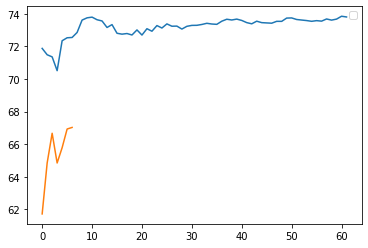

In [ ]:
import numpy as np

acc_train=[]
acc_test=[]
gnet.eval()
total = 0
correct = 0.
with torch.no_grad():
    for data in train_loader:
        inputs, targets= data
        inputs = inputs.to(device)
        targets = targets.to(device)
        outputs = gnet(inputs)
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == targets).sum().item() 
        total += inputs.size()[0] 
        acc=correct/total *100
        acc_train.append(acc)
        
        print("Accuracy on training data: ", round(correct/total, 2)*100)

total = 0.
correct = 0
with torch.no_grad():
    for data in test_loader:
        inputs, targets= data
        inputs = inputs.to(device)
        targets = targets.to(device)
        outputs = gnet(inputs)
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == targets).sum().item() 
        total += inputs.size()[0] 
        acc=correct/total *100
        acc_test.append(acc)
        
        print("Accuracy on testing data: ", round(correct/total, 2)*100)



plt.figure()
plt.plot(acc_train)
plt.plot(acc_test)
plt.legend()

No handles with labels found to put in legend.


['0_air_conditioner', '1_car_horn', '2_children_playing', '3_dog_bark', '4_drilling', '5_engine_idling', '6_gun_shot', '7_jackhammer', '8_siren', '9_street_music']
Test size Dataset ImageFolder
    Number of datapoints: 837
    Root location: /content/drive/My Drive/sound Classification/images/Test
    StandardTransform
Transform: Compose(
               Resize(size=224, interpolation=bilinear)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )
Train size Dataset ImageFolder
    Number of datapoints: 7894
    Root location: /content/drive/My Drive/sound Classification/images/Train
    StandardTransform
Transform: Compose(
               Resize(size=224, interpolation=bilinear)
               RandomHorizontalFlip(p=0.5)
               RandomRotation(degrees=[-30.0, 30.0], interpolation=nearest, expand=False, fill=0)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

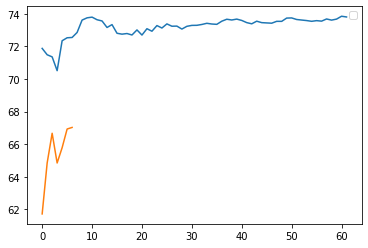

In [ ]:
plt.figure()
plt.plot(acc_train)
plt.plot(acc_test)
plt.legend()
classes = test_dataset.classes
print(classes)
print("Test size", test_dataset)
print("Train size", train_dataset)

In [ ]:
confusion_matrix = torch.zeros(len(classes),len(classes))
with torch.no_grad():
    for i, (inputs, classes) in enumerate(test_loader):
        inputs = inputs.to(device)
        classes = classes.to(device)
        outputs = gnet(inputs)
        _, preds = torch.max(outputs, 1)
        for t, p in zip(classes.view(-1), preds.view(-1)):
                confusion_matrix[t.long(), p.long()] += 1

print(confusion_matrix)

tensor([[41.,  0.,  6.,  2., 11., 36.,  0.,  2.,  2.,  0.],
        [ 1., 13.,  1.,  0.,  3.,  0.,  0.,  2.,  1., 12.],
        [ 0.,  1., 67., 15.,  6.,  3.,  0.,  0.,  1.,  7.],
        [ 2.,  1., 13., 66.,  1.,  1.,  3.,  0.,  5.,  8.],
        [ 3.,  2.,  2.,  4., 75.,  3.,  0.,  4.,  1.,  6.],
        [ 6.,  0.,  1.,  3.,  1., 66.,  0., 15.,  1.,  0.],
        [ 0.,  0.,  1.,  4.,  0.,  0., 27.,  0.,  0.,  0.],
        [ 3.,  0.,  0.,  1.,  1.,  1.,  0., 89.,  0.,  1.],
        [ 5.,  0.,  5., 22.,  4.,  5.,  2.,  1., 32.,  7.],
        [ 0.,  0., 11.,  1.,  1.,  0.,  0.,  1.,  1., 85.]])


In [ ]:
## plot confusion matrix
#get per class accuracy
class_names = test_dataset.classes
A=confusion_matrix.diag()/confusion_matrix.sum(1)
print(confusion_matrix.diag()/confusion_matrix.sum(1))
print(class_names)

tensor([0.4100, 0.3939, 0.6700, 0.6600, 0.7500, 0.7097, 0.8438, 0.9271, 0.3855,
        0.8500])
['0_air_conditioner', '1_car_horn', '2_children_playing', '3_dog_bark', '4_drilling', '5_engine_idling', '6_gun_shot', '7_jackhammer', '8_siren', '9_street_music']


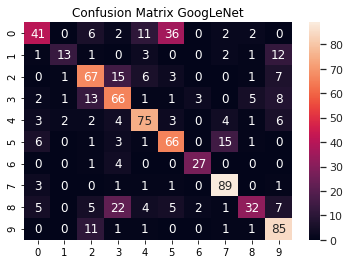

In [ ]:

import seaborn as sns
ax = plt.axes()
sns.set_theme(style="darkgrid")
sns.heatmap(confusion_matrix, annot=True, ax=ax)
#sns.heatmap(cf/np.sum(cf), annot=True, fmt='float', cmap='Blues')
ax.set_title('Confusion Matrix GoogLeNet')
plt.show()

In [ ]:
import numpy as np
class_names = test_dataset.classes
print(class_names)

def imshow(image):
    image = image.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean
    image = np.clip(image, 0, 1)
    plt.imshow(image)

['0_air_conditioner', '1_car_horn', '2_children_playing', '3_dog_bark', '4_drilling', '5_engine_idling', '6_gun_shot', '7_jackhammer', '8_siren', '9_street_music']


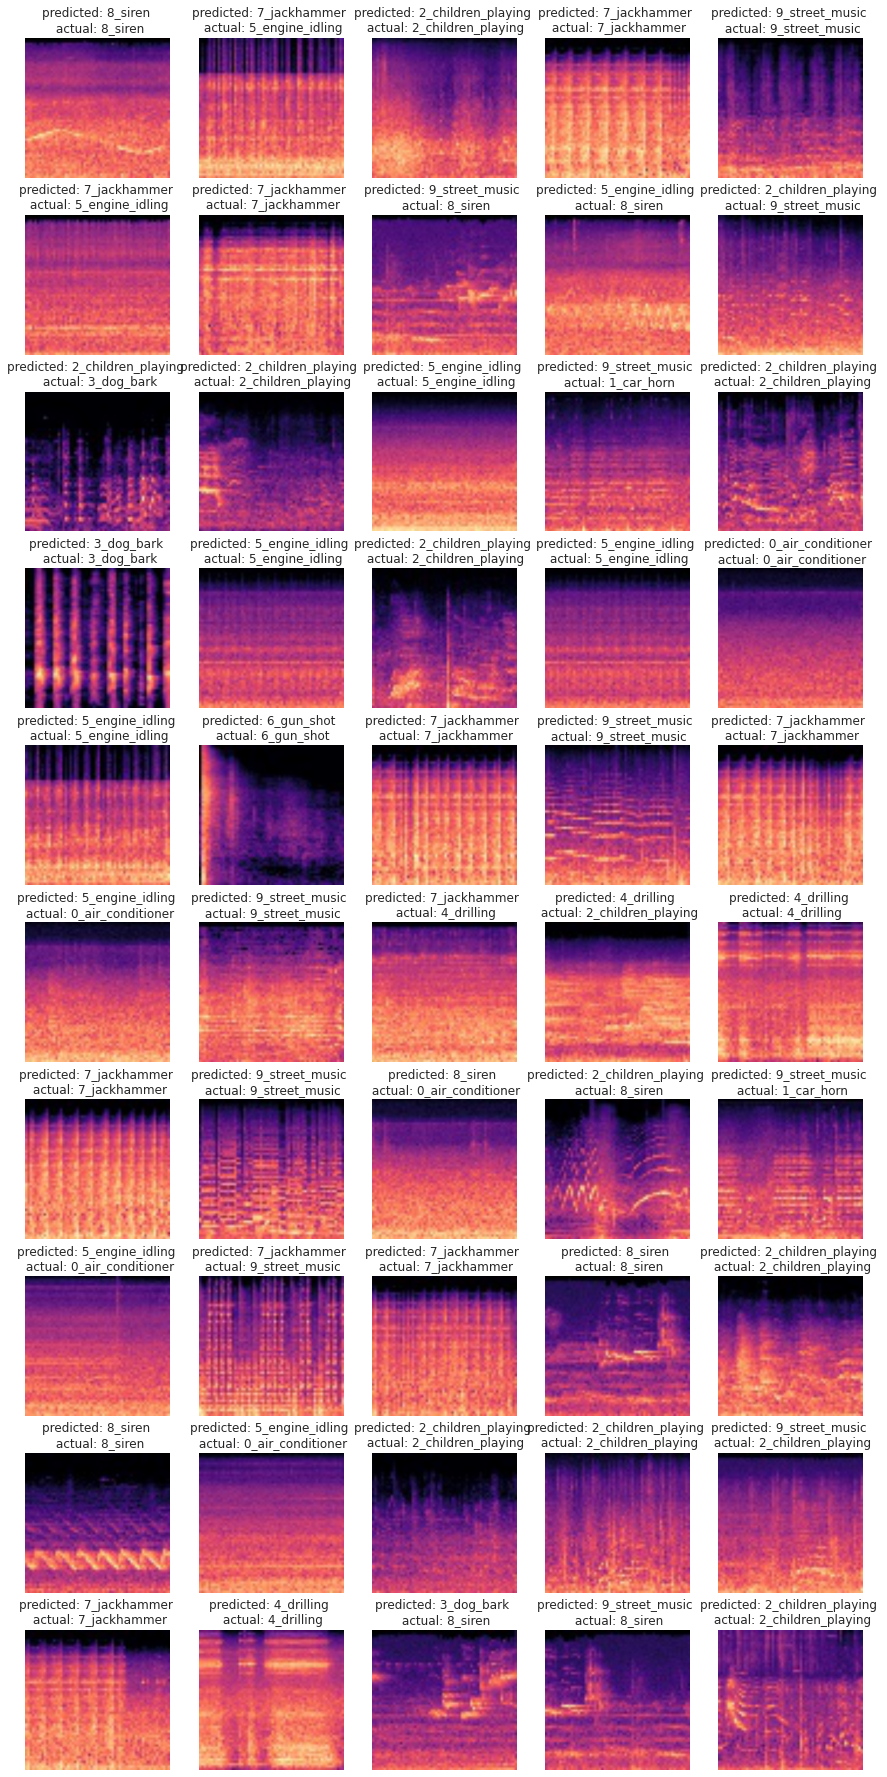

In [ ]:
test_loader = DataLoader(test_dataset, batch_size=50, shuffle=True)

def visualize_results(model):   
    model.eval()    
    fig = plt.figure(figsize=(15, 32))
    inputs, targets = data
    inputs = inputs.to(device)
    targets = targets.to(device)
    outputs = gnet(inputs)
    _, preds = torch.max(outputs.data, 1)

    for j in range(50):
        ax = plt.subplot(10, 5, j+1)
        ax.axis('off')       
        ax.set_title('predicted: {} \n actual: {}'.format(class_names[preds[j]], class_names[targets[j]]))
        imshow(inputs.cpu().data[j])


visualize_results(gnet)

In [ ]:
def conf_mat(con_mat):
    
    # Plot Confusion Matrix Data as a Matrix
    print(con_mat)
    plt.matshow(con_mat)
    plt.title('Confusion Matrix for Testing Data')
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
conf_mat(confusion_matrix)

tensor([0.4100, 0.3939, 0.6700, 0.6600, 0.7500, 0.7097, 0.8438, 0.9271, 0.3855,
        0.8500])
tensor([41.0000, 39.3939, 67.0000, 66.0000, 75.0000, 70.9677, 84.3750, 92.7083,
        38.5542, 85.0000])
['0_air_conditioner', '1_car_horn', '2_children_playing', '3_dog_bark', '4_drilling', '5_engine_idling', '6_gun_shot', '7_jackhammer', '8_siren', '9_street_music']


Text(0.5, 1.0, 'Accuracy per class-googLeNet')

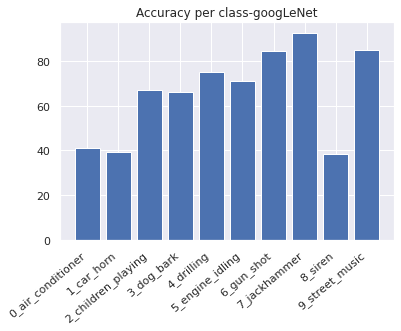

In [ ]:
#confusion_matrix=loaded['confusionmatrix']
A=confusion_matrix.diag()/confusion_matrix.sum(1)

print(A)
A=A*100
print( A)
class_names=['0_air_conditioner', '1_car_horn', '2_children_playing', '3_dog_bark', '4_drilling', '5_engine_idling', '6_gun_shot', '7_jackhammer', '8_siren', '9_street_music']

#class_names  = test_set.classes
print(class_names)


#sns.set_theme('darkgrid')
plt.bar(class_names, A)
plt.xticks(class_names,rotation=40, ha="right")
#z.set_xticklabels(class_names, rotation=40, ha="right")
plt.title("Accuracy per class-googLeNet")




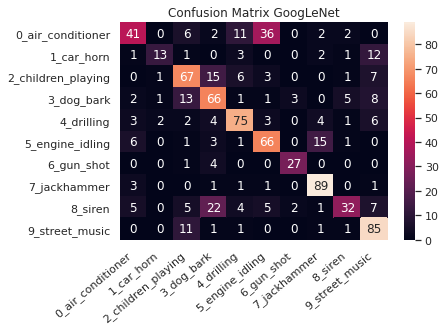

In [ ]:

import seaborn as sns
ax = plt.axes()
class_names=['0_air_conditioner', '1_car_horn', '2_children_playing', '3_dog_bark', '4_drilling', '5_engine_idling', '6_gun_shot', '7_jackhammer', '8_siren', '9_street_music']
sns.set_theme(style="darkgrid")
g=sns.heatmap(confusion_matrix, annot=True, ax=ax)
#sns.heatmap(cf/np.sum(cf), annot=True, fmt='float', cmap='Blues')
g.set_xticklabels(class_names,rotation=40, ha="right")
g.set_yticklabels(class_names,rotation=0, ha="right")
ax.set_title('Confusion Matrix GoogLeNet')
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
file='results.csv'
results = pd.read_csv(path+file)

Text(0.5, 1.0, 'Comparison of Accuracy')

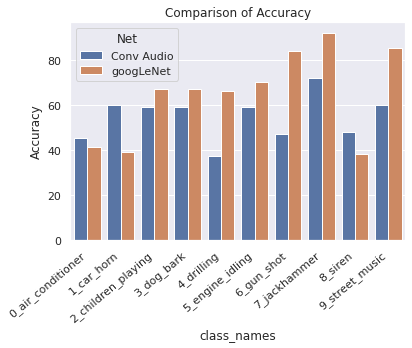

In [ ]:
z=sns.barplot(x=results.class_names,y=results.Accuracy, hue=results['Net'])
z.set_xticklabels(z.get_xticklabels(), rotation=40, ha="right")
z.set_title("Comparison of Accuracy")